# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below to import the dataset

In [1]:
import pandas as pd

df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_dataset.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

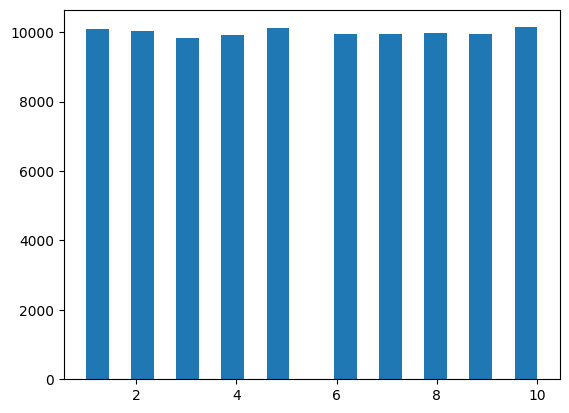

In [2]:
from matplotlib import pyplot as plt

plt.hist(df['quality rating'], bins=20)
plt.show()

In [3]:
df['quality rating'].value_counts()

10    10143
5     10124
1     10090
2     10030
8      9977
6      9961
9      9955
7      9954
4      9928
3      9838
Name: quality rating, dtype: int64

❓ Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [4]:
def binary_classification(int):
    if int<6:
        return 0
    if int>=6:
        return 1

data = df.copy()

data['quality rating'] = data['quality rating'].apply(lambda x: binary_classification(x))

y = data['quality rating']

❓ Check the class balance of the new binary target

In [5]:
y.value_counts()

0    50010
1    49990
Name: quality rating, dtype: int64

❓ Create your `X` by normalising the features. This will allow for fair comparison of different solvers.

<AxesSubplot:>

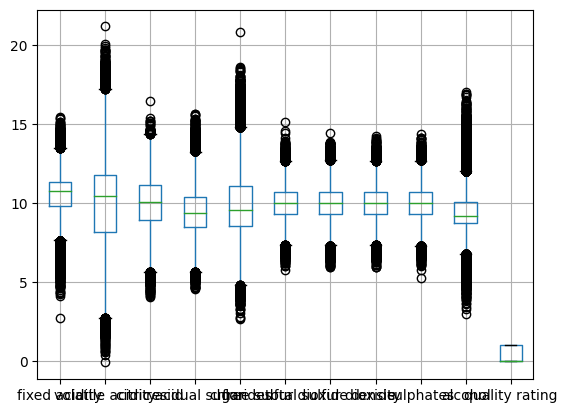

In [6]:
data.boxplot()

In [7]:
X = data.drop('quality rating', axis=1)

In [8]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() # Instanciate Robust Scaler

r_scaler.fit(X) # Fit scaler to data

X_scaled = r_scaler.transform(X) # Use scaler to transform data

## 2. LogisticRegression solvers

❓ Logistic Regression models can be optimized using different **solvers**. Make a comparison of the available solvers':
- Fit time - which solver is **the fastest**?
- Precision - **how different** are their respective precision scores?

Available solvers for Logistic Regression are `['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this Stack Overflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_time = []
precision = []

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=10000)
    cv_results = cross_validate(model,X_scaled,y,cv=10, scoring=['precision'])
    cv_results = pd.DataFrame(cv_results)
    fit_time.append(cv_results['fit_time'].mean())
    precision.append(cv_results['test_precision'].mean())

print(fit_time)
print(precision)

[0.34737420082092285, 0.06855142116546631, 0.09056143760681153, 0.3721951484680176, 0.5412042617797852]
[0.8738641436019788, 0.8738668117352582, 0.8738668117352582, 0.8738641436019788, 0.8738641436019788]


In [10]:
# YOUR ANSWER
fastest_solver = solvers[fit_time.index(min(fit_time))]
fastest_solver

'lbfgs'

<details>
    <summary>ℹ️ Click here for our interpretation</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function.

**The wine dataset**
    
If you check feature importance with sklearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html">permutation_importance</a> on the current dataset, you'll see many features result in almost 0 importance. Liblinear solver successively moves only along *one* direction at a time, regularizing the others with L1 regularization (a.k.a, setting their beta to 0), which might provide a good fit for a dataset where many features are not that important in predicting the target.

</details> 

###  🧪 Test your code

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'solvers',
    fastest_solver=fastest_solver
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-solvers/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_solvers.py::TestSolvers::test_fastest_solver PASSED                 [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master



## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

❓ Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [12]:
from sklearn.linear_model import SGDClassifier

model_sgd = SGDClassifier(loss='log_loss')

cv_results_sgd = cross_validate(model_sgd,X_scaled,y,cv=10, scoring=['precision'])
cv_results_sgd = pd.DataFrame(cv_results_sgd)

print(cv_results_sgd['fit_time'].mean())
print(cv_results_sgd['test_precision'].mean())

0.09406697750091553
0.8708552533649208


> 💡 Precision is better and fit time is quite low (2nd lowest fit time) compared to the other models

☝️ The SGD model should have one of the shortest times (maybe even shorter than `liblinear`), for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single row as opposed to loading 100k rows into memory at a time.

## 4. Predictions

❓ Use the best model (balanced with short fit time and high precision) to predict the binary quality (0 or 1) of the following wine. Store your:
- `predicted_class`
- `predicted_proba_of_class`

In [13]:
new_wine = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_new_wine.csv')
new_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.54,13.5,12.35,8.78,14.72,9.06,9.67,10.15,11.17,12.17


In [14]:
new_wine_scaled = r_scaler.transform(new_wine)

In [15]:
model_sgd = SGDClassifier(loss='log_loss')
model_sgd.fit(X_scaled,y)
model_sgd.predict(new_wine_scaled)
model_sgd.predict_proba(new_wine_scaled)

array([[0.96166841, 0.03833159]])

In [16]:
predicted_class = model_sgd.predict(new_wine_scaled)[0]
predicted_proba_of_class = model_sgd.predict_proba(new_wine_scaled)[0][predicted_class]

print(predicted_class)
print(predicted_proba_of_class)

0
0.9616684103465639


# 🏁  Check your code and push your notebook

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-solvers/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_new_data_prediction.py::TestNewDataPrediction::test_predicted_class PASSED [ 50%]
test_new_data_prediction.py::TestNewDataPrediction::test_predicted_proba PASSED [100%]

============================== 2 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/new_data_prediction.pickle

git commit -m 'Completed new_data_prediction step'

git push origin master

